In [385]:
import warnings
warnings.simplefilter("ignore")
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import silhouette_score


In [3]:
def parse_json_gz(file_path):
        with open(file_path, 'r') as f:
            for line in f:
                yield json.loads(line)

In [5]:
metadata = list(parse_json_gz(r'C:\Users\lipin\ML Projects\Capstone Project Phase 1\Recommender System\SMART Local\data\meta-Pennsylvania.json\meta-Pennsylvania.json'))


In [367]:
metadata_df = pd.DataFrame(metadata)

In [409]:
metadata_df['category'] = metadata_df['category'].fillna("")

# Removing records with latitude and longitude outside of PA range

#metadata_df.drop(metadata_df[metadata_df["longitude"] > -70].index, inplace = True)

#metadata_df.drop(metadata_df[metadata_df["longitude"] < -80].index, inplace = True)

#metadata_df.drop_duplicates(inplace=True)

# Create a new column to fill the empty MISC Columns

def CreateMISC():
    empty_dict = {'Service options': ""}
    metadata_df["MISC_NEW"] = metadata_df["MISC"].apply(lambda row: row if bool(row) else empty_dict)

CreateMISC()



In [411]:
metadata_misc = pd.DataFrame(metadata_df["MISC_NEW"].tolist())


In [415]:
metadata_misc["Service options"] = metadata_misc["Service options"].fillna("")
MLB1 = MultiLabelBinarizer()
serviceoptions = MLB1.fit_transform(metadata_misc["Service options"])
serviceoptions = pd.DataFrame(serviceoptions, columns = MLB1.classes_)
SVD = TruncatedSVD(n_components=4, random_state=42)
serviceoptions_svd = SVD.fit_transform(serviceoptions)
serviceoptions_svd = pd.DataFrame(serviceoptions_svd, columns =['s_op1','s_op2','s_op3','s_op4'])
SVD.explained_variance_ratio_.sum()

0.8123832064955447

In [417]:
metadata_final = metadata_df.drop(["address","description","price","relative_results","url","name","category","MISC","MISC_NEW","hours","gmap_id","state"], axis =1)
metadata_final = pd.concat([metadata_final,serviceoptions_svd],axis =1)

In [439]:
metadata_final.corr()

,latitude,longitude,avg_rating,num_of_reviews,s_op1,s_op2,s_op3,s_op4
latitude,1.000000,-0.207763,0.030522,-0.035679,-0.012422,0.014608,-0.006624,0.005434
longitude,-0.207763,1.000000,-0.025713,0.031816,0.009909,-0.012562,0.015709,-0.013210
avg_rating,0.030522,-0.025713,1.000000,-0.014002,-0.039542,0.038869,0.003279,-0.031981
num_of_reviews,-0.035679,0.031816,-0.014002,1.000000,0.276266,-0.079758,0.131211,-0.028971
s_op1,-0.012422,0.009909,-0.039542,0.276266,1.000000,-0.069555,0.043508,0.049017
s_op2,0.014608,-0.012562,0.038869,-0.079758,-0.069555,1.000000,0.006304,0.001929
s_op3,-0.006624,0.015709,0.003279,0.131211,0.043508,0.006304,1.000000,-0.008919
s_op4,0.005434,-0.013210,-0.031981,-0.028971,0.049017,0.001929,-0.008919,1.000000


<Axes: >

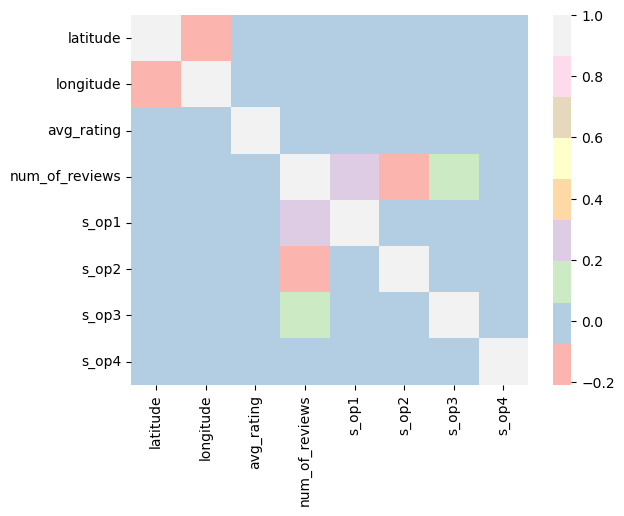

In [463]:
import seaborn as sns
sns.color_palette("light:b", as_cmap=True)
sns.heatmap(metadata_final.corr(), cmap = 'Pastel1')

In [419]:
metadata_final.drop(metadata_final[metadata_final["longitude"] > -70].index, inplace = True)

metadata_final.drop(metadata_final[metadata_final["longitude"] < -80].index, inplace = True)


In [393]:

sc = StandardScaler()
metadata_scaled = sc.fit_transform(metadata_final)
metadata_scaled = pd.DataFrame(metadata_scaled, columns = metadata_scale.columns)

epsrange = [0.3]

for i in epsrange:
    db_scan = DBSCAN(eps=i, min_samples=100).fit(metadata_scaled)
    labels = db_scan.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    print(f"Silhouette Coefficient: {silhouette_score(metadata_scaled, labels):.3f}")


Estimated number of clusters: 20
Estimated number of noise points: 76494
Silhouette Coefficient: -0.165


In [389]:

sc = StandardScaler()
metadata_scaled = sc.fit_transform(metadata_final)
metadata_scaled = pd.DataFrame(metadata_scaled, columns = metadata_scale.columns)

epsrange = [0.6,0.7,0.8]

for i in epsrange:
    db_scan = DBSCAN(eps=i, min_samples=100).fit(metadata_scaled)
    labels = db_scan.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    print(f"Silhouette Coefficient: {silhouette_score(metadata_scaled, labels):.3f}")


Estimated number of clusters: 21
Estimated number of noise points: 24468
Silhouette Coefficient: 0.034
Estimated number of clusters: 18
Estimated number of noise points: 17322
Silhouette Coefficient: 0.063
Estimated number of clusters: 20
Estimated number of noise points: 12282
Silhouette Coefficient: 0.051


In [391]:

sc = StandardScaler()
metadata_scaled = sc.fit_transform(metadata_final)
metadata_scaled = pd.DataFrame(metadata_scaled, columns = metadata_scale.columns)

epsrange = [0.9,1.5,2.5]

for i in epsrange:
    db_scan = DBSCAN(eps=i, min_samples=100).fit(metadata_scaled)
    labels = db_scan.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    print(f"Silhouette Coefficient: {silhouette_score(metadata_scaled, labels):.3f}")


Estimated number of clusters: 16
Estimated number of noise points: 9225
Silhouette Coefficient: 0.090
Estimated number of clusters: 2
Estimated number of noise points: 1387
Silhouette Coefficient: 0.210
Estimated number of clusters: 2
Estimated number of noise points: 231
Silhouette Coefficient: 0.207


In [421]:

sc = StandardScaler()
metadata_scaled = sc.fit_transform(metadata_final)
metadata_scaled = pd.DataFrame(metadata_scaled, columns = metadata_scale.columns)


db_scan = DBSCAN(eps=0.9, min_samples=100).fit(metadata_scaled)
labels = db_scan.labels_
    # Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
    
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print(f"Silhouette Coefficient: {silhouette_score(metadata_scaled, labels):.3f}")


Estimated number of clusters: 20
Estimated number of noise points: 9293


In [397]:
cluster_0 = [index for index, value in enumerate(labels) if value == -1]

<Figure size 1500x1500 with 0 Axes>

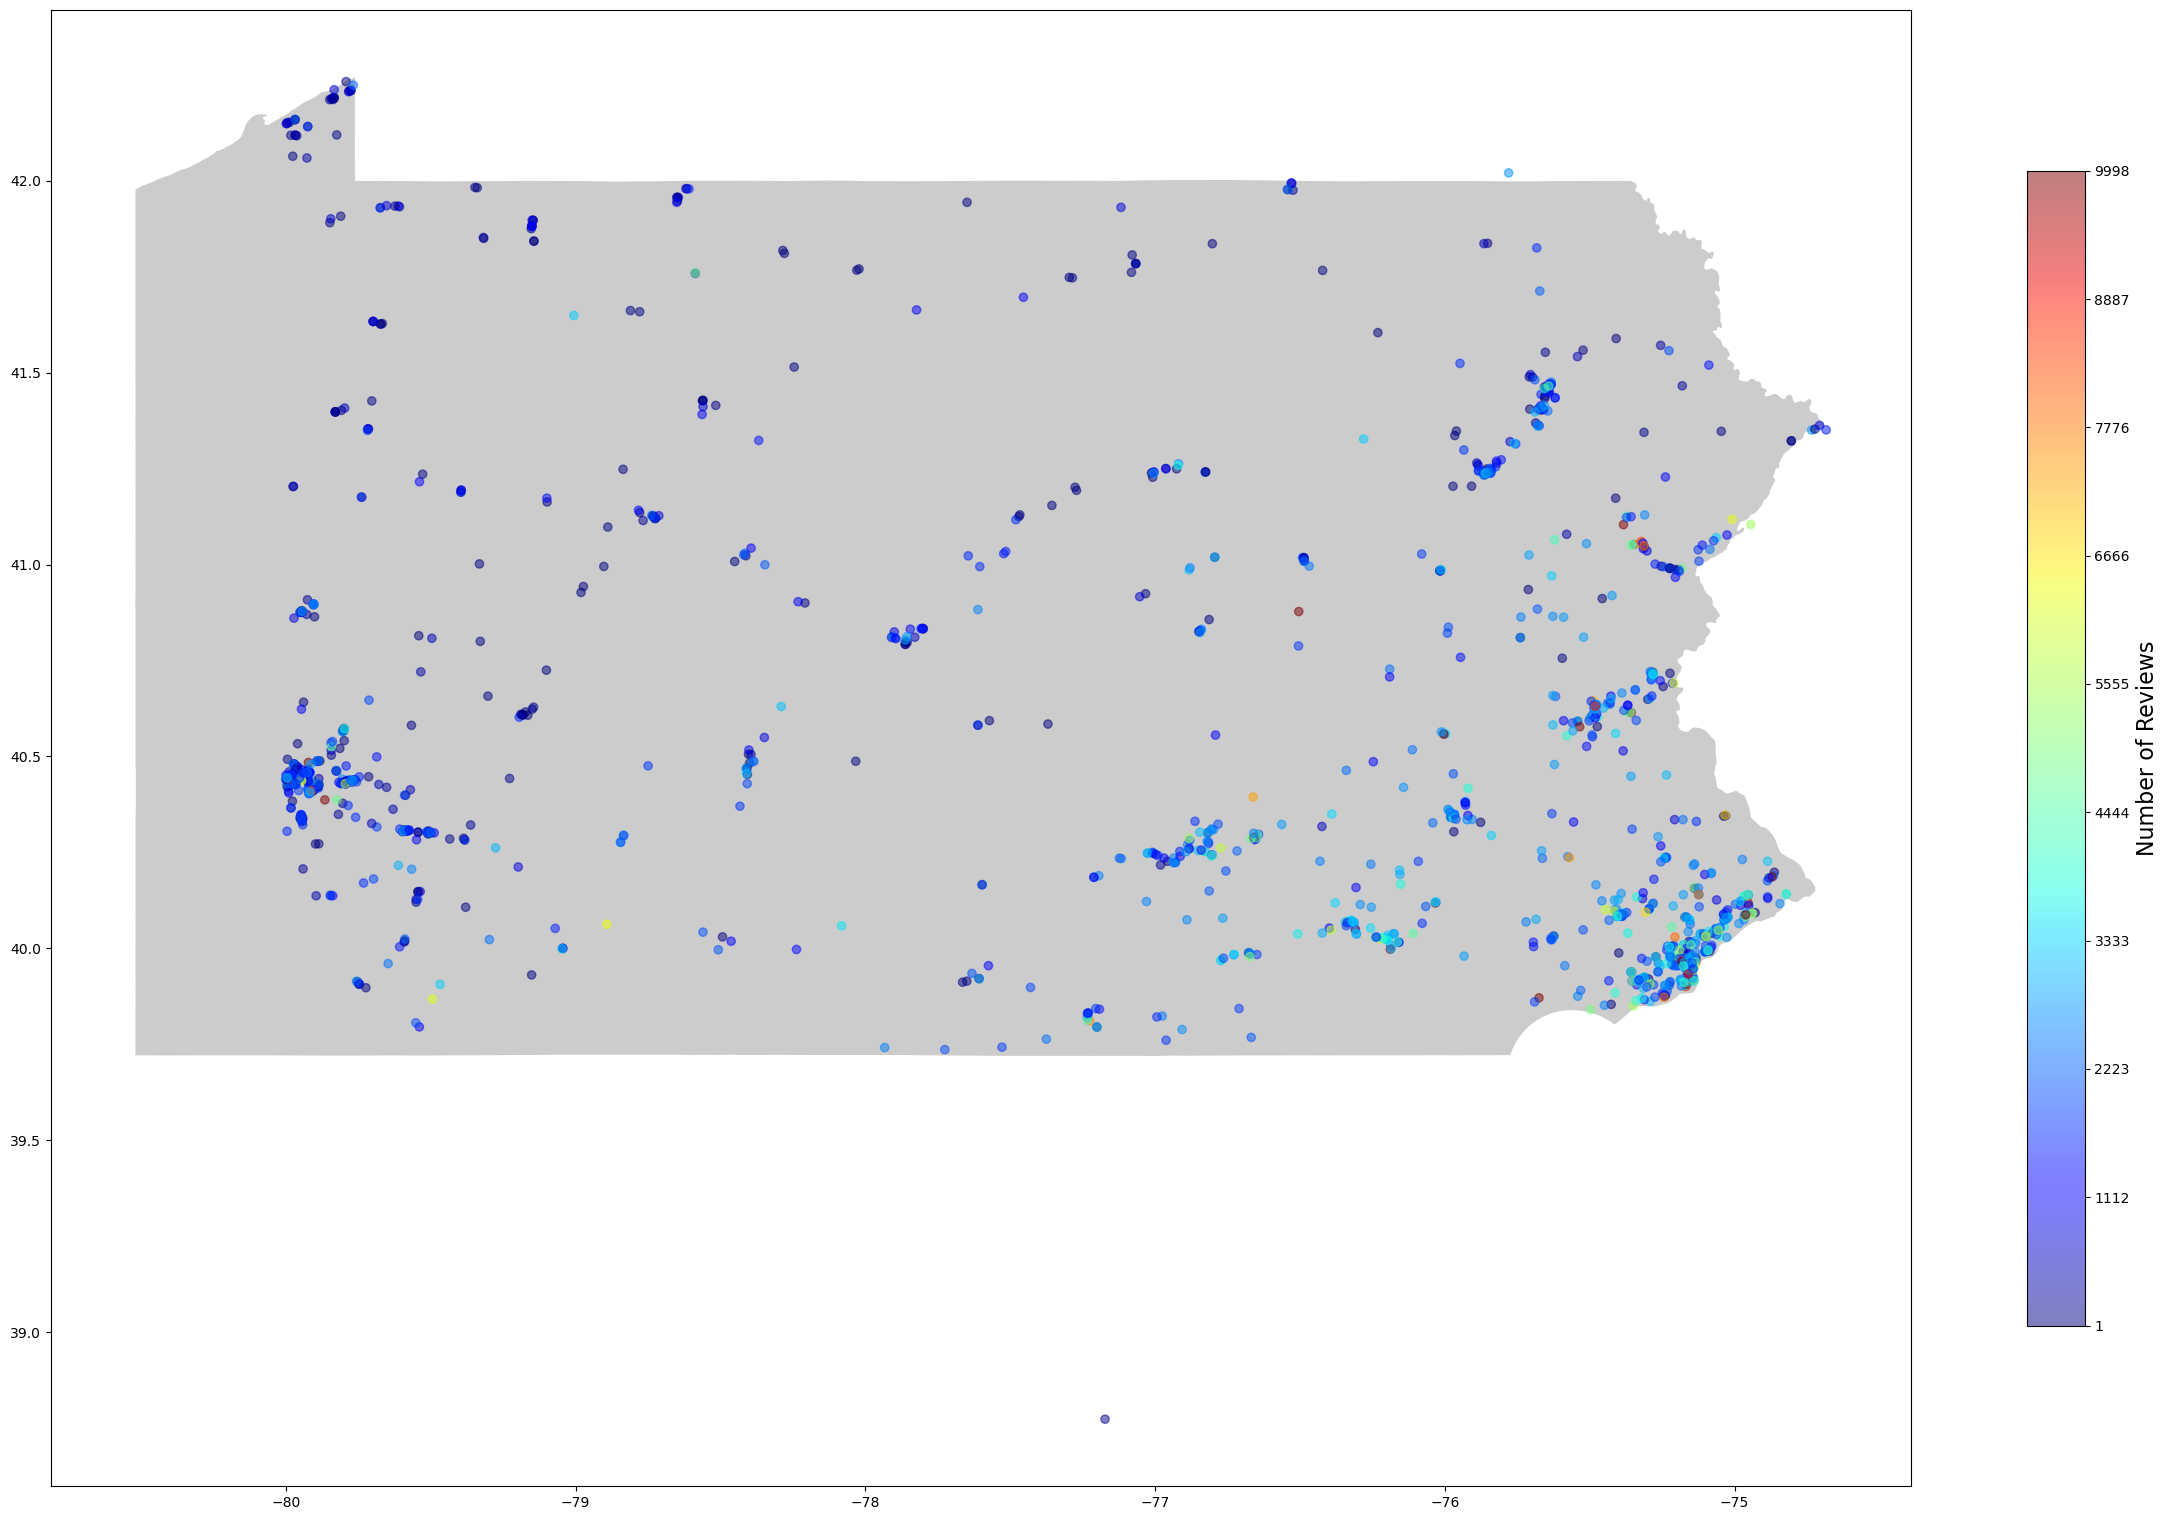

In [399]:


cluster_0_set = metadata_final.iloc[cluster_0]
states = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
pa = states[states["STUSPS"] == "PA"]
fig = plt.figure(figsize=(15, 15)) 
#ax = pa.plot(alpha=0.4, color='grey')
fig, ax=plt.subplots(figsize=(30,30))

pa.plot(ax=ax,legend=True,alpha=0.4, color='grey')
plt.scatter(cluster_0_set["longitude"],cluster_0_set["latitude"],c=cluster_0_set["num_of_reviews"],cmap=plt.get_cmap("jet"),alpha=0.5)
num_reviews = cluster_0_set["num_of_reviews"]
ticks = np.linspace(num_reviews.min(),num_reviews.max(), num=10)
cbar = plt.colorbar(shrink=0.5)
tick_lables = [round(v) for v in ticks]
cbar.set_ticks(tick_lables)
cbar.set_label('Number of Reviews', fontsize=16)



In [403]:
metadata_df.iloc[cluster_0]

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,MISC_NEW
245,Sam's Auto Repair And Sales LLC,"Sam's Auto Repair And Sales LLC, 4220 Jonestow...",0x89c8b94a9af8b9a5:0xab66a11f75b71f56,None,40.298190,-76.823359,[Auto repair shop],4.7,48,None,"[[Wednesday, 7:30AM–7PM], [Thursday, 7:30AM–7P...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 7:30AM Thu,None,https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
513,Palestine Church,"Palestine Church, 4242 Schoonover Rd, Morrisda...",0x89cc3e691a8c2d35:0x9a23c5101a612ec9,None,41.023371,-78.221335,[Church],4.3,3,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89cc160a6c7c5e23:0x93a07d46c44d5953, 0x89cc...",https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
1116,Northwestern Human Service,"Northwestern Human Service, 305 W Chestnut Hil...",0x89c6b96fb3367e09:0x280c73bba476f83b,None,40.074734,-75.215879,[Association or organization],5.0,6,None,None,None,None,"[0x89c6b16229e77c11:0x1eba49b20f23846b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,{'Service options': 'Test'}
1384,United States Postal Service,"United States Postal Service, 155 Center St, T...",0x89c655d611f58519:0xd8453432890954fc,None,39.832117,-75.753929,"[Post office, Logistics service, Money order s...",4.5,8,None,"[[Wednesday, 8:30AM–1PM], [Thursday, 8:30AM–1P...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8:30AM Thu,"[0x89c6f2db7a950629:0xe576aa1ee4ec147b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
2869,Newport School District,"Newport School District, 559 N 5th St, Newport...",0x89c8d4288a8dda0d:0x5682394b9f35deae,None,40.483952,-77.139654,"[Elementary school, Education]",3.9,7,None,"[[Monday, 7AM–3PM], [Tuesday, 7AM–3PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 7AM Tue,"[0x89c8d427f795747b:0xd7b5abf12c493b81, 0x89c9...",https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168128,Sunoco,"Sunoco, 977 S Broadway, Wind Gap, PA 18091",0x89c467b51e5bd789:0xea94e9a538e36b2c,None,40.836956,-75.296269,[Gas station],3.9,8,None,"[[Sunday, 5AM–10PM], [Monday, 5AM–11PM], [Tues...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 10PM,None,https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
168193,Crafton Heights Town Home Inc,"Crafton Heights Town Home Inc, 1592 Crucible S...",0x8834f680e552b663:0x5a03a82ec40c2f7e,None,40.445623,-80.051358,"[Townhouse complex, Property management company]",3.1,18,None,None,None,None,"[0x8834f7a5aa072c83:0xe93fa1d159fd1f8d, 0x8834...",https://www.google.com/maps/place//data=!4m2!3...,{'Service options': 'Test'}
168210,Lancaster Toyota Service,"Lancaster Toyota Service, 1107 Enterprise Rd, ...",0x89c623ea442ed695:0x9a1fd9f4669b2a00,None,40.089828,-76.350285,[Car repair and maintenance],4.7,508,None,"[[Sunday, Closed], [Monday, 7AM–6PM], [Tuesday...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 7AM Mon,"[0x89c623ea442ed695:0xbccef3db69516650, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...,{'Accessibility': ['Wheelchair accessible entr...
168214,Dollar General,"Dollar General, 553 W Main St, Mount Joy, PA 1...",0x89c89eee8e9da415:0xb4fde3af5852b4a0,Bargain retail chain selling a range of househ...,40.113580,-76.517267,"[Dollar store, Convenience store, Discount sto...",4.0,367,$,"[[Sunday, 8AM–9PM], [Monday, 8AM–9PM], [Tuesda...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 9PM,"[0x89c89e441cdc6169:0x51d297df514343fd, 0x89c8...",https://www.google.com/maps/place//data=!4m2!3...,"{'Service options': ['In-store pickup', '

In [385]:
reviews = list(parse_json_gz(r'C:\Users\lipin\ML Projects\Capstone Project Phase 1\Recommender System\SMART Local\data\review-Pennsylvania.json\review-Pennsylvania.json'))


In [387]:
reviews_df = pd.DataFrame(reviews)

In [389]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21944802 entries, 0 to 21944801
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   name     object 
 2   time     int64  
 3   rating   float64
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ GB


In [395]:
reviews_new = reviews_df.drop(["name","text","pics","resp"],axis =1)

In [397]:
reviews_new.drop_duplicates(inplace=True)

In [405]:
reviews_new = reviews_new.dropna(subset =['user_id', 'rating'])

In [407]:
reviews_new.head()

,user_id,time,rating,gmap_id
0,102412752646300974692,1630529977304,5.0,0x89c46d5e4554eae1:0xa2f8b211524ca29a
1,103300386878743113897,1630544172046,5.0,0x89c46d5e4554eae1:0xa2f8b211524ca29a
2,104715843317030599809,1631012728526,5.0,0x89c46d5e4554eae1:0xa2f8b211524ca29a
3,107728779403687866453,1630460639875,5.0,0x89c46d5e4554eae1:0xa2f8b211524ca29a
4,108797523914815340168,1630435490430,5.0,0x89c46d5e4554eae1:0xa2f8b211524ca29a


In [411]:
total = pd.merge(reviews_new, metadata_new, on=['gmap_id'], how='left')

In [415]:
total = total.drop(total[total["state"] == "Permanently closed"].index, axis =0)
total = total.drop(["state"], axis =1)

In [419]:
total_new = total.drop(["user_id","gmap_id"], axis =1)

In [421]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
total_scaled = sc.fit_transform(total_new)
total_scaled = pd.DataFrame(total_scaled, columns = total_new.columns)

In [423]:
total_scaled.head()

,time,rating,latitude,longitude,avg_rating,num_of_reviews,s_op1,s_op2,s_op3,s_op4
0,1.850035,0.610765,0.497865,0.550885,0.479859,-0.606879,0.397532,-0.692675,-0.959319,1.216315
1,1.850366,0.610765,0.497865,0.550885,0.479859,-0.606879,0.397532,-0.692675,-0.959319,1.216315
2,1.861286,0.610765,0.497865,0.550885,0.479859,-0.606879,0.397532,-0.692675,-0.959319,1.216315
3,1.848419,0.610765,0.497865,0.550885,0.479859,-0.606879,0.397532,-0.692675,-0.959319,1.216315
4,1.847833,0.610765,0.497865,0.550885,0.479859,-0.606879,0.397532,-0.692675,-0.959319,1.216315


In [ ]:
db_scan = DBSCAN(eps=0.3, min_samples=10).fit(total_scaled)

labels = db_scan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


In [429]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190816 entries, 0 to 190815
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              190816 non-null  object 
 1   address           188090 non-null  object 
 2   gmap_id           190816 non-null  object 
 3   description       31045 non-null   object 
 4   latitude          190816 non-null  float64
 5   longitude         190816 non-null  float64
 6   category          190816 non-null  object 
 7   avg_rating        190816 non-null  float64
 8   num_of_reviews    190816 non-null  int64  
 9   price             35935 non-null   object 
 10  hours             144070 non-null  object 
 11  MISC              154252 non-null  object 
 12  state             133096 non-null  object 
 13  relative_results  177663 non-null  object 
 14  url               190816 non-null  object 
 15  MISC_NEW          190816 non-null  object 
dtypes: float64(3), int64

avg_rating       NaN
num_of_reviews   NaN
dtype: float64